In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season'] == 'Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [8]:
df = df.merge(region_df,on="NOC",how = 'left')

In [9]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN  

[222552 rows x 17 columns]

In [10]:
df['region'].unique().shape

(206,)

In [11]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [12]:
df.duplicated().sum()

1385

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

In [15]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [16]:
df= pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [17]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

region  Gold  Silver  Bronze
0              USA  2472    1333    1197
1           Russia  1220     974     994
2          Germany  1075     987    1064
3               UK   635     729     620
4            Italy   518     474     454
..             ...   ...     ...     ...
200        Lesotho     0       0       0
201        Albania     0       0       0
202          Libya     0       0       0
203  Liechtenstein     0       0       0
204        Liberia     0       0       0

[205 rows x 4 columns]

In [18]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN   False  True   False  
4190    Gold  India   NaN   False  True   False  
4460    Gold  India   NaN   False  True   False  
4461    Gold  India   NaN   False  True   False  
4462    Gold  India   NaN   False  True   False  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN   False  True   False  
193964  Gold  India   NaN   False  True   False  
193965  Gold  India   NaN   False  True   False  
205949  Gold  India   NaN   False  True   False  
219336  Gold  India   NaN   False  True   False  

[131 rows x 20 columns]

In [19]:
medal_tally = df.drop_duplicates(subset=['Team','Games','NOC','City','Sport','Event','Medal'])

In [20]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = False).reset_index()

In [21]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [22]:
medal_tally

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [23]:
years = df['Year'].unique().tolist()

In [24]:
years.sort()

In [25]:
years.insert(0,'overall')

In [26]:
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [27]:
country = np.unique(df['region'].dropna().values).tolist()

In [28]:
country.sort()

In [29]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [30]:
country.insert(0,'overall')

In [31]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [32]:
def fetch_medal_tally(df ,year, country):
    medal_df = df.drop_duplicates(subset=['Team','Games','NOC','City','Sport','Event','Medal'])
    flag = 0

    if year == 'overall' and country == 'overall':
        temp_df = medal_df 
    elif year == 'overall' and country != 'overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    elif year != 'overall' and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    else:
        temp_df = medal_df[(medal_df['region'] == country) & (medal_df['Year'] == int(year))]

    if flag == 1:
        x = temp_df.groupby('Year').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']]\
                  .sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']]\
                  .sort_values('Gold', ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)



In [33]:
fetch_medal_tally(df,year='overall', country='USA')   # Country-specific medals across all years
fetch_medal_tally(df ,year='2016', country='overall')  # All countries' medal tally in 2016
fetch_medal_tally(df ,year='2012', country='India')    # India's medal tally in 2012


    Year  Gold  Silver  Bronze  total
0   1896    11       6       2     19
1   1900    21      16      17     54
2   1904    76      79      76    231
3   1906    12       5       6     23
4   1908    22      12      12     46
5   1912    26      18      19     63
6   1920    41      27      27     95
7   1924    45      27      27     99
8   1928    22      18      16     56
9   1932    44      36      30    110
10  1936    24      21      12     57
11  1948    38      27      19     84
12  1952    40      19      17     76
13  1956    32      25      17     74
14  1960    34      21      16     71
15  1964    36      26      28     90
16  1968    45      28      34    107
17  1972    33      31      30     94
18  1976    34      35      25     94
19  1984    82      61      30    173
20  1988    36      31      27     94
21  1992    37      34      37    108
22  1996    44      32      25    101
23  2000    36      24      31     91
24  2004    36      39      26    101
25  2008    

In [34]:
df.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal   region notes  Bronze   Gold  Silver  
0   Basketball Men's Basketball   NaN    China   NaN   False  False   False  
1  Judo Men's Extra-Lightweight   NaN    China   NaN   False  False   False  
2       Football Men's Football   NaN  Denmark   NaN   False  False   False

In [35]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [36]:
df['Year'].unique().shape

(29,)

In [37]:
df['Year'].unique().shape[0]-1

28

In [38]:
df['City'].unique().shape[0]

23

In [39]:
df['Sport'].unique().shape[0]

52

In [40]:
df['Event'].unique().shape[0]

651

In [41]:
df['Name'].unique().shape[0]

116122

In [42]:
df['region'].unique().shape[0]

206

In [43]:
import plotly.express as px 

In [44]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'] \
  .value_counts() \
  .reset_index(name='count') \
  .rename(columns={'index': 'Year'}) \
  .sort_values('Year')


In [45]:
nations_over_time.rename(columns={'Year':'Edition','count':'No of Countries'},inplace=True)

In [46]:
fig = px.line(nations_over_time, x ='Edition', y='No of Countries')
fig.show() 

In [47]:
df.drop_duplicates(['Year','Event'])['Year'] \
  .value_counts() \
  .reset_index(name='count') \
  .rename(columns={'index': 'Year'}) \
  .sort_values('Year')

Year  count
28  1896     43
26  1900     90
25  1904     95
27  1906     74
23  1908    109
24  1912    107
14  1920    158
20  1924    131
22  1928    122
21  1932    131
18  1936    150
15  1948    153
19  1952    149
16  1956    151
17  1960    150
13  1964    163
12  1968    172
11  1972    193
10  1976    198
9   1980    203
8   1984    221
7   1988    237
6   1992    257
5   1996    271
4   2000    300
3   2004    301
1   2008    302
2   2012    302
0   2016    306

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

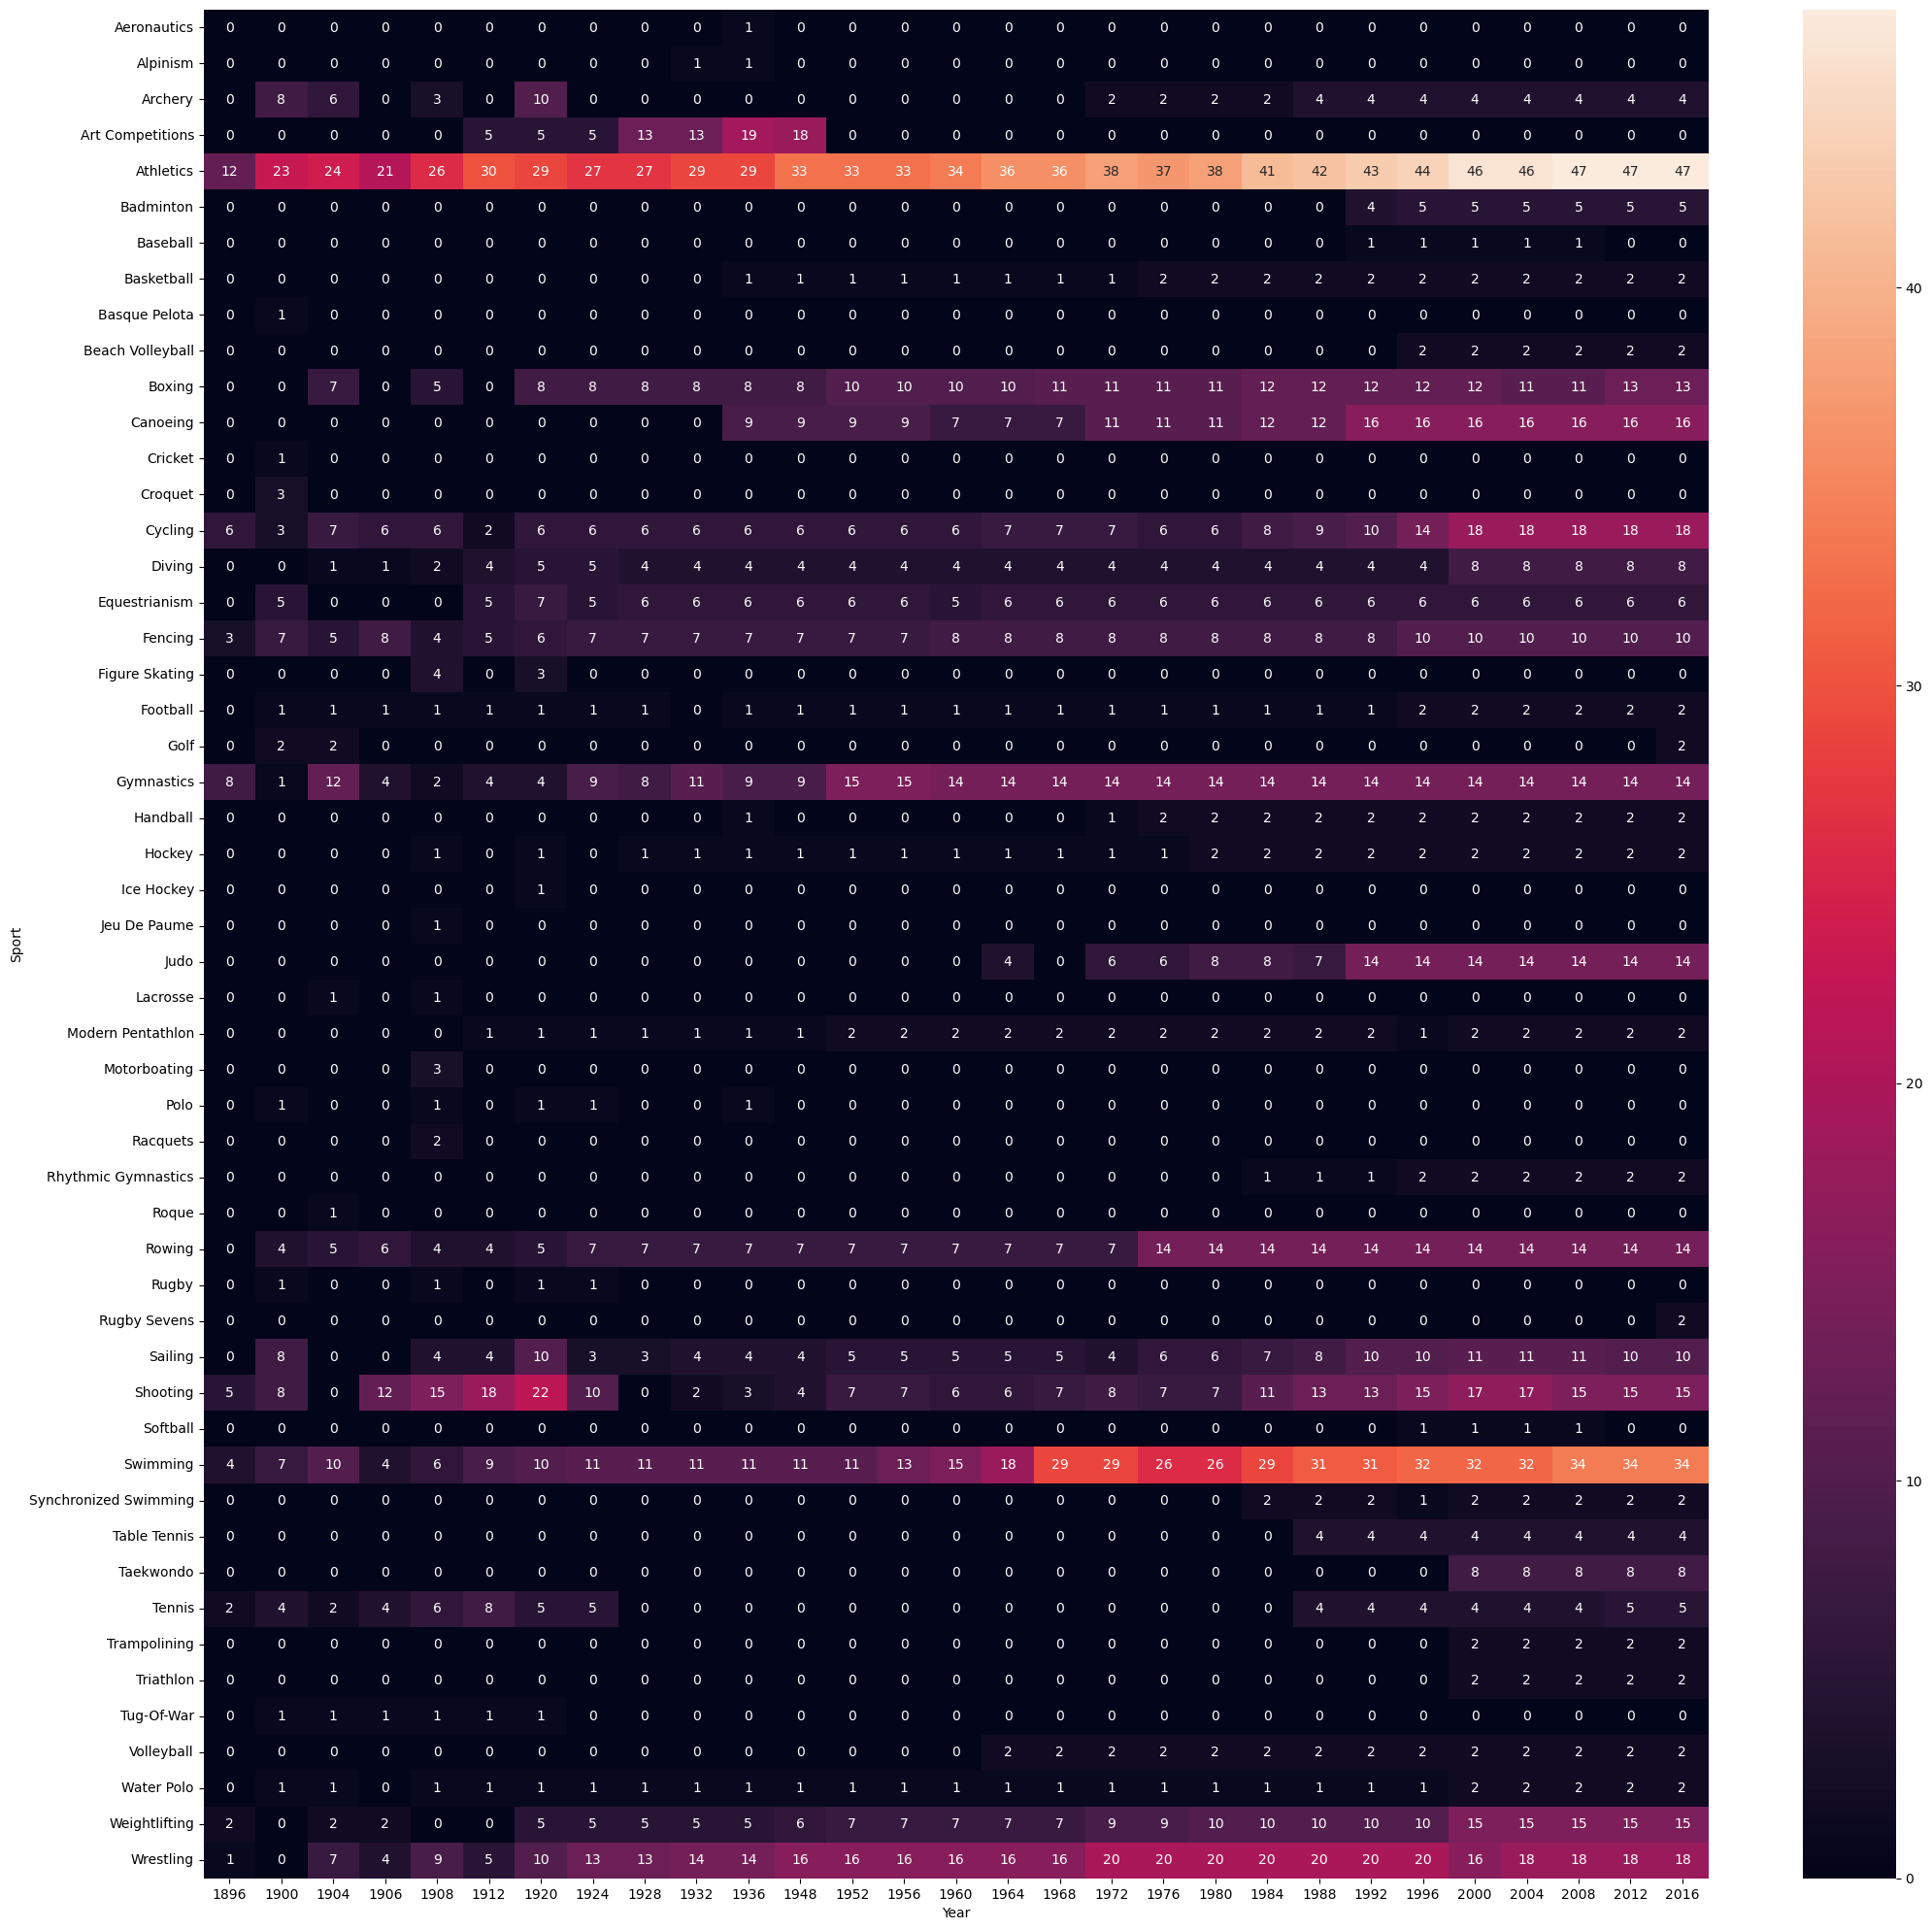

In [50]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [51]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=["Medal"])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    # Step 1: Count top medal winners
    top_athletes = temp_df["Name"].value_counts().reset_index()
    top_athletes.columns = ['Name', 'Medal_Count']  # rename columns properly

    # Step 2: Merge with original df to get sport & region
    merged = top_athletes.merge(df, on='Name', how='left')[['Name', 'Medal_Count', 'Sport', 'region']].drop_duplicates('Name')

    return merged.head(15)


In [52]:
most_successful(df,"Overall")

Name  Medal_Count       Sport  \
0                            Michael Fred Phelps, II           28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)           18  Gymnastics   
49                      Nikolay Yefimovich Andrianov           15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin           13  Gymnastics   
97                                       Takashi Ono           13  Gymnastics   
130                              Edoardo Mangiarotti           13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)           12    Swimming   
157                          Aleksey Yuryevich Nemov           12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)           12    Swimming   
195                           Birgit Fischer-Schmidt           12    Canoeing   
208                               Ryan Steven Lochte           12    Swimming   
222                             Paavo Johannes Nurmi           12   Athletics   
234                                       Sawao Kato           12  Gymnastics   
258                    Natalie Anne Coughlin (-Hall)           12    Swimming   
270                   Matthew Nicholas "Matt" Biondi           11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany  
208      USA  
222  Finland  
234    Japan  
258      USA  
270      USA

country wise analysis


In [54]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','Games','NOC','City','Sport','Event','Medal'],inplace=True)

C:\Users\fahad\AppData\Local\Temp\ipykernel_8628\789035852.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
new_df = temp_df[temp_df['region'] == "USA"]
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [56]:
final_df

Year  Medal
0   1896     19
1   1900     54
2   1904    231
3   1906     23
4   1908     46
5   1912     63
6   1920     95
7   1924     99
8   1928     56
9   1932    110
10  1936     57
11  1948     84
12  1952     76
13  1956     74
14  1960     71
15  1964     90
16  1968    107
17  1972     94
18  1976     94
19  1984    173
20  1988     94
21  1992    108
22  1996    101
23  2000     91
24  2004    101
25  2008    110
26  2012    103
27  2016    121

In [57]:
fig = px.line(final_df, x ='Year', y='Medal')
fig.show() 

<Axes: xlabel='Year', ylabel='Sport'>

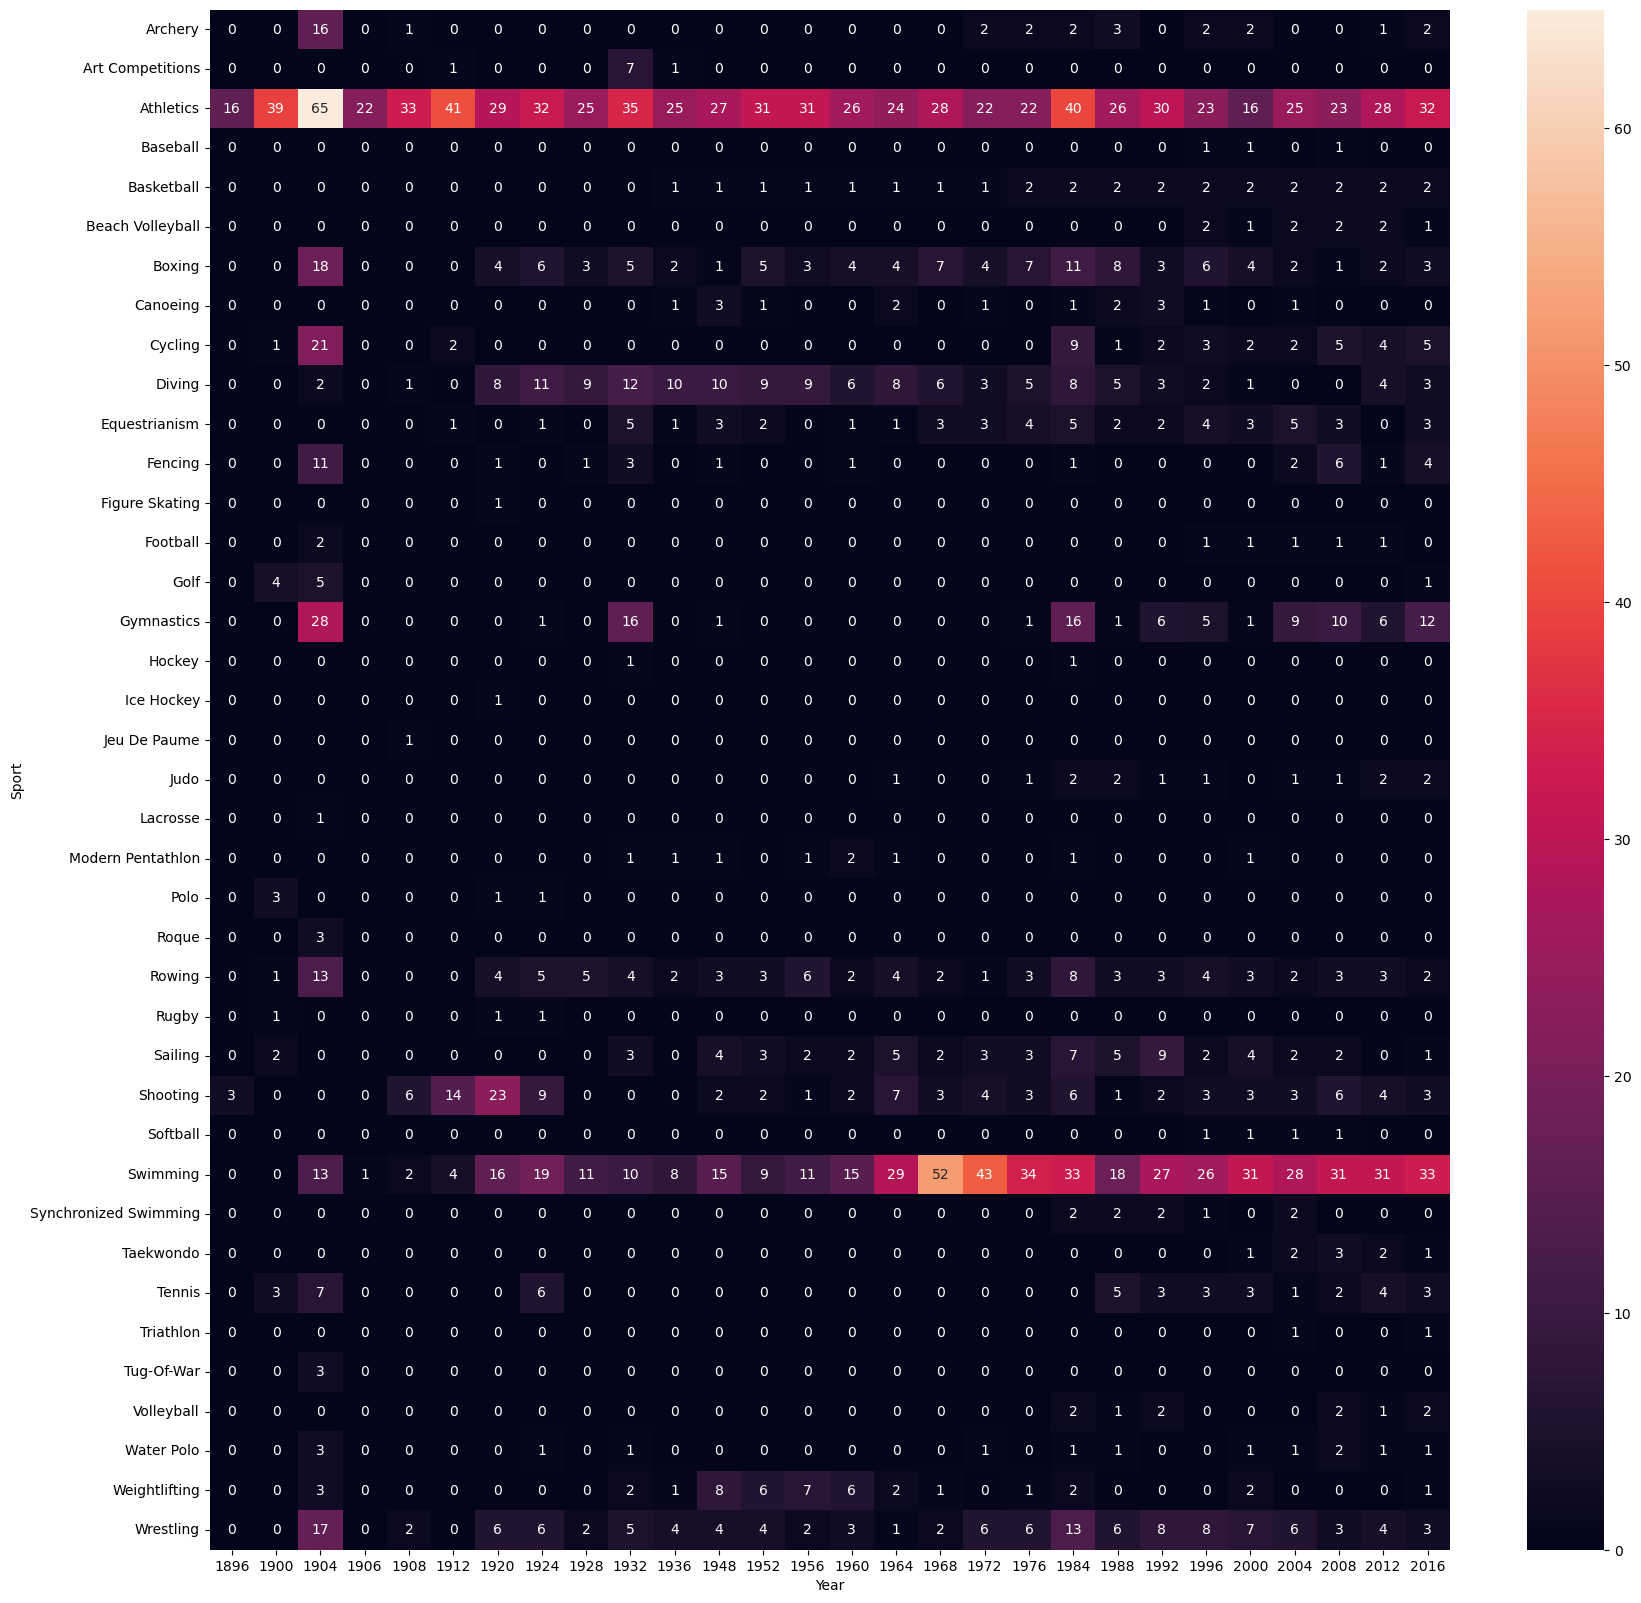

In [58]:
new_df = temp_df[temp_df['region'] == "USA"]
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns= 'Year', values = 'Medal', aggfunc = "count").fillna(0),annot=True)

In [59]:
def most_successful_countrywise(df, country):
    temp_df = df.dropna(subset=["Medal"])

    
    temp_df = temp_df[temp_df['region'] == country]

    # Step 1: Count top medal winners
    top_athletes = temp_df["Name"].value_counts().reset_index()
    top_athletes.columns = ['Name', 'Medal_Count']  # rename columns properly

    # Step 2: Merge with original df to get sport & region
    merged = top_athletes.merge(df, on='Name', how='left')[['Name', 'Medal_Count', 'Sport', ]].drop_duplicates('Name')

    return merged.head(15)

In [60]:
most_successful_countrywise(df,'USA')

Name  Medal_Count      Sport
0                            Michael Fred Phelps, II           28   Swimming
30                                Ryan Steven Lochte           12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)           12   Swimming
61                     Natalie Anne Coughlin (-Hall)           12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)           12   Swimming
86                    Matthew Nicholas "Matt" Biondi           11   Swimming
98                              Carl Townsend Osburn           11   Shooting
114                                Mark Andrew Spitz           11   Swimming
126                      Raymond Clarence "Ray" Ewry           10  Athletics
136                   Frederick Carlton "Carl" Lewis           10  Athletics
146                             Gary Wayne Hall, Jr.           10   Swimming
156                           Allyson Michelle Felix            9  Athletics
166                           Martin Joseph Sheridan            9  Athletics
181                        Shirley Frances Babashoff            9   Swimming
192                           Nathan Ghar-Jun Adrian            8   Swimming

In [61]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze   Gold  \
0   Basketball Men's Basketball   NaN        China   NaN   False  False   
1  Judo Men's Extra-Lightweight   NaN        China   NaN   False  False   
2       Football Men's Football   NaN      Denmark   NaN   False  False   
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN   False   True   
4  Athletics Women's 100 metres   NaN  Netherlands   NaN   False  False   

   Silver  
0   False  
1   False  
2   False  
3   False  
4   False

In [62]:
import plotly.figure_factory as ff

In [63]:
athlete_df = df.drop_duplicates(['Name','region'])

In [64]:
#fig = ff.create_displot([athlete_df['Age'].dropna(),['Age Distribution ']])
#fig.show()

In [65]:
import plotly.express as px

athlete_df = df.drop_duplicates(['Name', 'region'])
athlete_df = athlete_df.dropna(subset=['Age'])  # ensure no NaN in 'Age'

fig = px.histogram(athlete_df, x='Age', nbins=40, title='Age Distribution of Athletes')
fig.show()


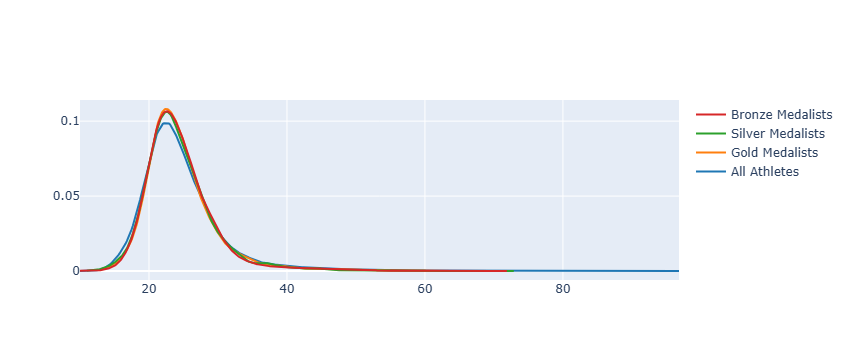

In [137]:
import plotly.figure_factory as ff

x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

fig = ff.create_distplot(
    [x1, x2, x3, x4],
    group_labels=['All Athletes', 'Gold Medalists', 'Silver Medalists', 'Bronze Medalists'],
    show_hist=False,
    show_rug=False
)

fig.show()


In [139]:
athlete_df['Medal'].fillna('No Medal',inplace = True)

C:\Users\fahad\AppData\Local\Temp\ipykernel_8628\524805123.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

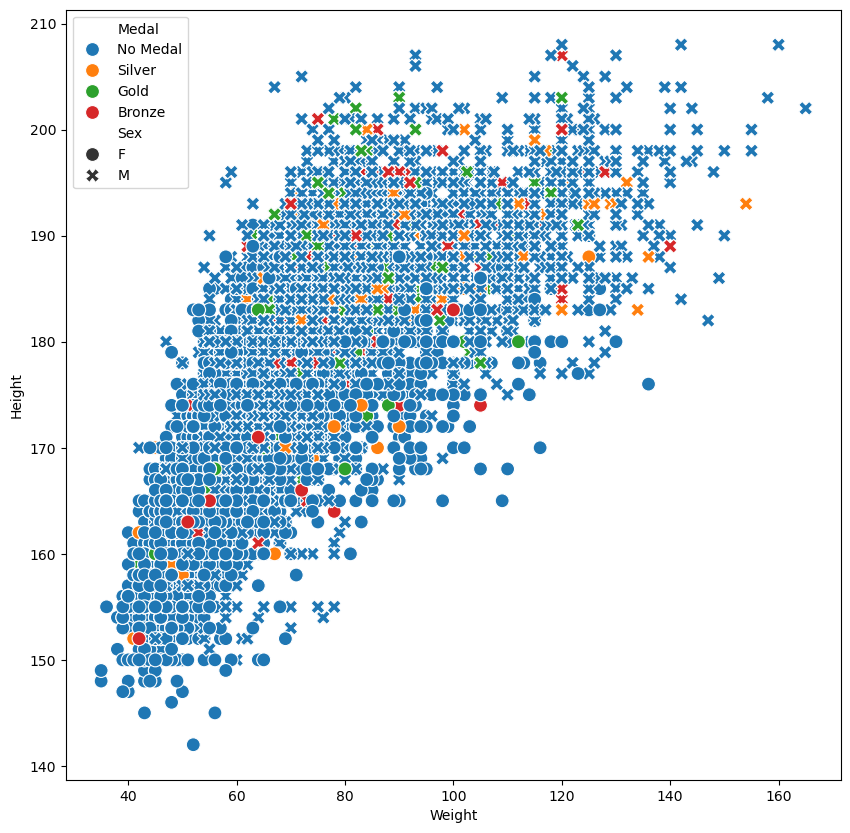

In [153]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=athlete_df['Weight'], y=athlete_df['Height'],hue = temp_df['Medal'],style=temp_df['Sex'],s=100)

In [155]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()


In [157]:
men

Year  Name
0   1896    72
1   1900   611
2   1904   481
3   1906   330
4   1908  1319
5   1912  1893
6   1920  1755
7   1924  1937
8   1928  1832
9   1932  1174
10  1936  3404
11  1948  2820
12  1952  3306
13  1956  1781
14  1960  3645
15  1964  3256
16  1968  3474
17  1972  4476
18  1976  3295
19  1980  3003
20  1984  4144
21  1988  4630
22  1992  4745
23  1996  4811
24  2000  4294
25  2004  3931
26  2008  3990
27  2012  3679
28  2016  4022

In [159]:
women

Year  Name
0   1900    16
1   1904     5
2   1906     2
3   1908    36
4   1912    53
5   1920    65
6   1924    95
7   1928   236
8   1932   144
9   1936   303
10  1948   365
11  1952   398
12  1956   264
13  1960   472
14  1964   507
15  1968   598
16  1972   815
17  1976  1026
18  1980   856
19  1984  1363
20  1988  1730
21  1992  2073
22  1996  2518
23  2000  2790
24  2004  2820
25  2008  2946
26  2012  2919
27  2016  3209

In [161]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

In [163]:
final.fillna(0, inplace=True)

In [165]:
final

Year  Male  Female
0   1896    72     0.0
1   1900   611    16.0
2   1904   481     5.0
3   1906   330     2.0
4   1908  1319    36.0
5   1912  1893    53.0
6   1920  1755    65.0
7   1924  1937    95.0
8   1928  1832   236.0
9   1932  1174   144.0
10  1936  3404   303.0
11  1948  2820   365.0
12  1952  3306   398.0
13  1956  1781   264.0
14  1960  3645   472.0
15  1964  3256   507.0
16  1968  3474   598.0
17  1972  4476   815.0
18  1976  3295  1026.0
19  1980  3003   856.0
20  1984  4144  1363.0
21  1988  4630  1730.0
22  1992  4745  2073.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2946.0
27  2012  3679  2919.0
28  2016  4022  3209.0